In [44]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.util import img_as_ubyte, img_as_float
from pathlib import Path
import torch
from PIL import Image
from pyaqua3ddev.image_processing.seathru import SeaThru

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
def imshow(img: np.ndarray, color_channel="rgb"):
    if img.dtype == np.float64 and len(img.shape) == 3:
        img = img_as_ubyte(img)

    if color_channel == "bgr":
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_channel == "hsv":
        img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)

    plt.imshow(img)

    if len(img.shape) == 2:
        plt.colorbar()

In [46]:
name = "T_S04912"
# name = "T_S04921"
# name = "T_S04923"

png_file = Path(f"../../data/seathru/D3/D3/linearPNG/{name}.png")
tif_file = Path(f"../../data/seathru/D3/D3/depth/depth{name}.tif")

In [47]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

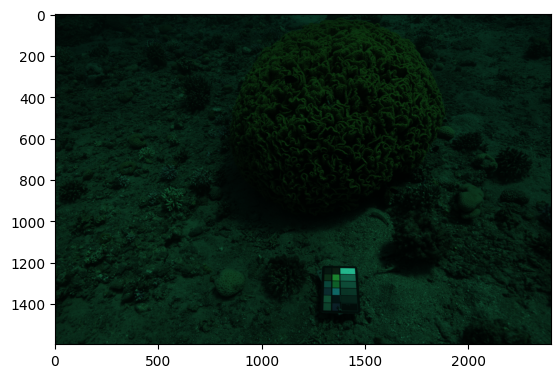

In [48]:
png = img_as_float(cv2.imread(png_file))
height, width, _ = png.shape

imshow(png, color_channel="bgr")

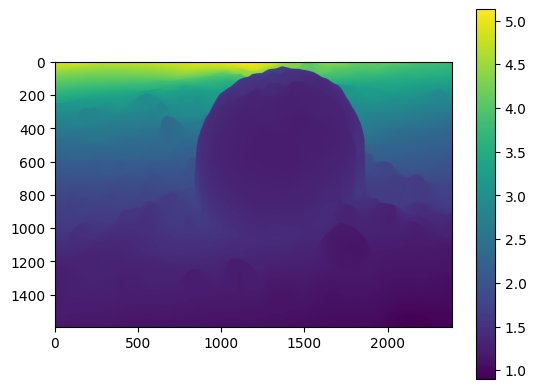

In [49]:
tif_image = Image.open(tif_file)
tif = np.array(tif_image)

imshow(tif)

/home/chris/Repos/school/e4e/fishsense/pyAqua3dDev/pyaqua3ddev/image_processing/seathru.py:293: RuntimeWarning: divide by zero encountered in divide
  args: Tuple[float, float, float, float], E: np.ndarray, z: np.ndarray
/home/chris/.cache/pypoetry/virtualenvs/pyaqua3ddev--DOk9sNS-py3.12/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


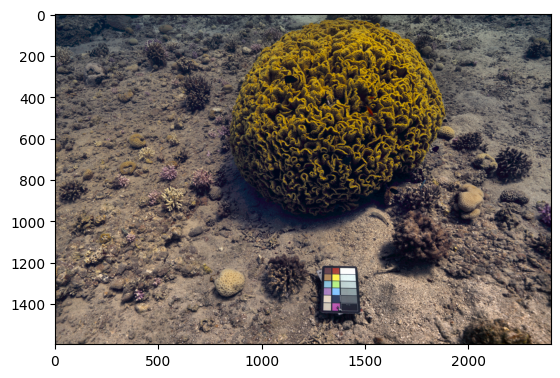

In [50]:
seathru = SeaThru(device)

processed = seathru.process(png, tif)

imshow(processed, color_channel="bgr")